- https://www.tensorflow.org/api_docs/python/tf

## step 1. 데이터 준비

In [2]:
# import 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt   # 시각화


In [3]:
# dataset 로드 

(train_images ,train_labels ), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# 탐색- shape, 건수, 값 
train_images.shape 

(60000, 28, 28)

In [5]:
train_labels.shape 

(60000,)

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# test_images 의 샘플 수?
test_images.shape

(10000, 28, 28)

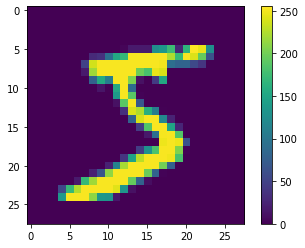

In [9]:
# train_images[0] 이미지

plt.figure()
plt.imshow(train_images[0])  # 이미지 show
plt.colorbar()
# plt.grid(True)
plt.show()


## step 2. 전처리

In [10]:
# 1. image data(28*28) 를 1차원 텐서로 변환
# reshape, 왜? Dense layer - flatten

In [45]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [12]:
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)

In [13]:
train_images.shape

(60000, 784)

In [14]:
# 2. label을 encoding : one-hot encoding
# 현재는 label encoding
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
# one-hot encoding
# 0 : [1,0,0,0,0,0,0,0,0,0]
# 1 : [0,1,0,0,0,0,0,0,0,0]
#
# 9 : [0,0,0,0,0,0,0,0,0,1]

from tensorflow.keras.utils import to_categorical
# 인수로 넘겨받은 리스트에서 유니크한 것만 골라서 카테고리로 사용

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels.shape

(60000, 10)

In [17]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## step 3. 모델 만들기


In [18]:
from tensorflow.keras import models, layers

In [19]:
model = models.Sequential()
# model.add(layers.Input(shape=(28*28,))) # 추가해도 됨
# model.add(layers.Flatten())      # reshape 1차원
model.add(layers.Dense(units=512,
                       activation='relu',
                       input_shape=(28*28,)))
model.add(layers.Dense(units=10 , activation='softmax'))
# 0~9 분류 10 , 확률값

In [20]:
model.summary() # 레이어 두 개로 보이지만 input까지 합쳐서 세 개 인 것!

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
# weight, bias 갯수
# input layer feature 수?  784
# hidden layer units ? 512
# hidden layer  : w = 784 * 512 b = 512 

# output layer parameter 갯수 식 : 512*10+10


## step 4. 손실함수, 옵티마이저, 성능지표 선택

In [22]:
model.compile(optimizer='rmsprop',  # 경사하강법(weight을 업데이트 하는 방법)
              loss='categorical_crossentropy',  # 예측값이 확률로 나올때, target 이 one-hot
              metrics=['accuracy'])             # 정수로 하고 싶으면 sparse_categorical_..

## step 5. fit

In [23]:
60000*0.8 / 128

375.0

In [24]:
# weight가 몇 번 업데이트 되는 지가 중요!!
# [문제] 샘플 수 100건, epoch = 1, batch_size = 10 >> ? 10번
# 샘플 100건, epoch = 3, batch_size = 10 >> 30번

In [25]:
history = model.fit(train_images, train_labels,
                    epochs=30, 
                    batch_size=128,   # step
                    validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 1s 3ms/step - loss: 7.6237 - accuracy: 0.8869 - val_loss: 1.0483 - val_accuracy: 0.9453
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.8493 - accuracy: 0.9524 - val_loss: 0.9161 - val_accuracy: 0.9534
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.5819 - accuracy: 0.9643 - val_loss: 0.8669 - val_accuracy: 0.9602
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.4454 - accuracy: 0.9713 - val_loss: 0.7629 - val_accuracy: 0.9627
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.9773 - val_loss: 0.7260 - val_accuracy: 0.9682
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2875 - accuracy: 0.9809 - val_loss: 0.9554 - val_accuracy: 0.9607
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.9816 - val_loss: 0.8682 - val_accuracy: 0.9657
Epoch 

## step 6. 훈련과정 시각화

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

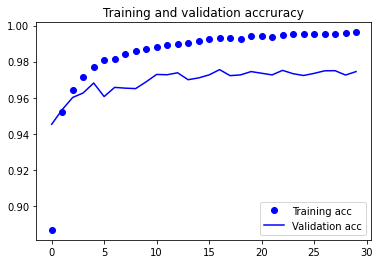

In [34]:
plt.plot(epochs, acc, 'bo', label="Training acc")       # 파란 점
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # 파란 선
plt.title("Training and validation accruracy")
plt.legend()

plt.show()

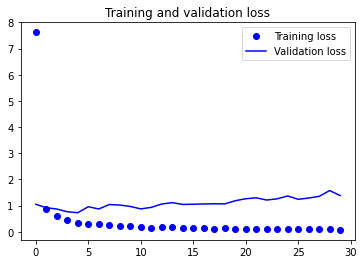

In [35]:
plt.plot(epochs, loss, 'bo', label="Training loss")       # 파란 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # 파란 선
plt.title("Training and validation loss")
plt.legend()

plt.show()

## step 7. 평가

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.2530 - accuracy: 0.9776


In [38]:
model.save('./mnist_model.h5')

In [39]:
new_model = models.load_model('./mnist_model.h5')

In [40]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## step 8. 예측하기

In [41]:
import numpy as np
predict = model.predict(test_images[5].reshape(1, 784))

print('predict probability: ', predict) # softmax
print('predict number: ', np.argmax(predict))

predict probability:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
predict number:  1


In [42]:
np.argmax(predict)  # max의 index 출력

1

In [43]:
test_images[5].shape

(784,)